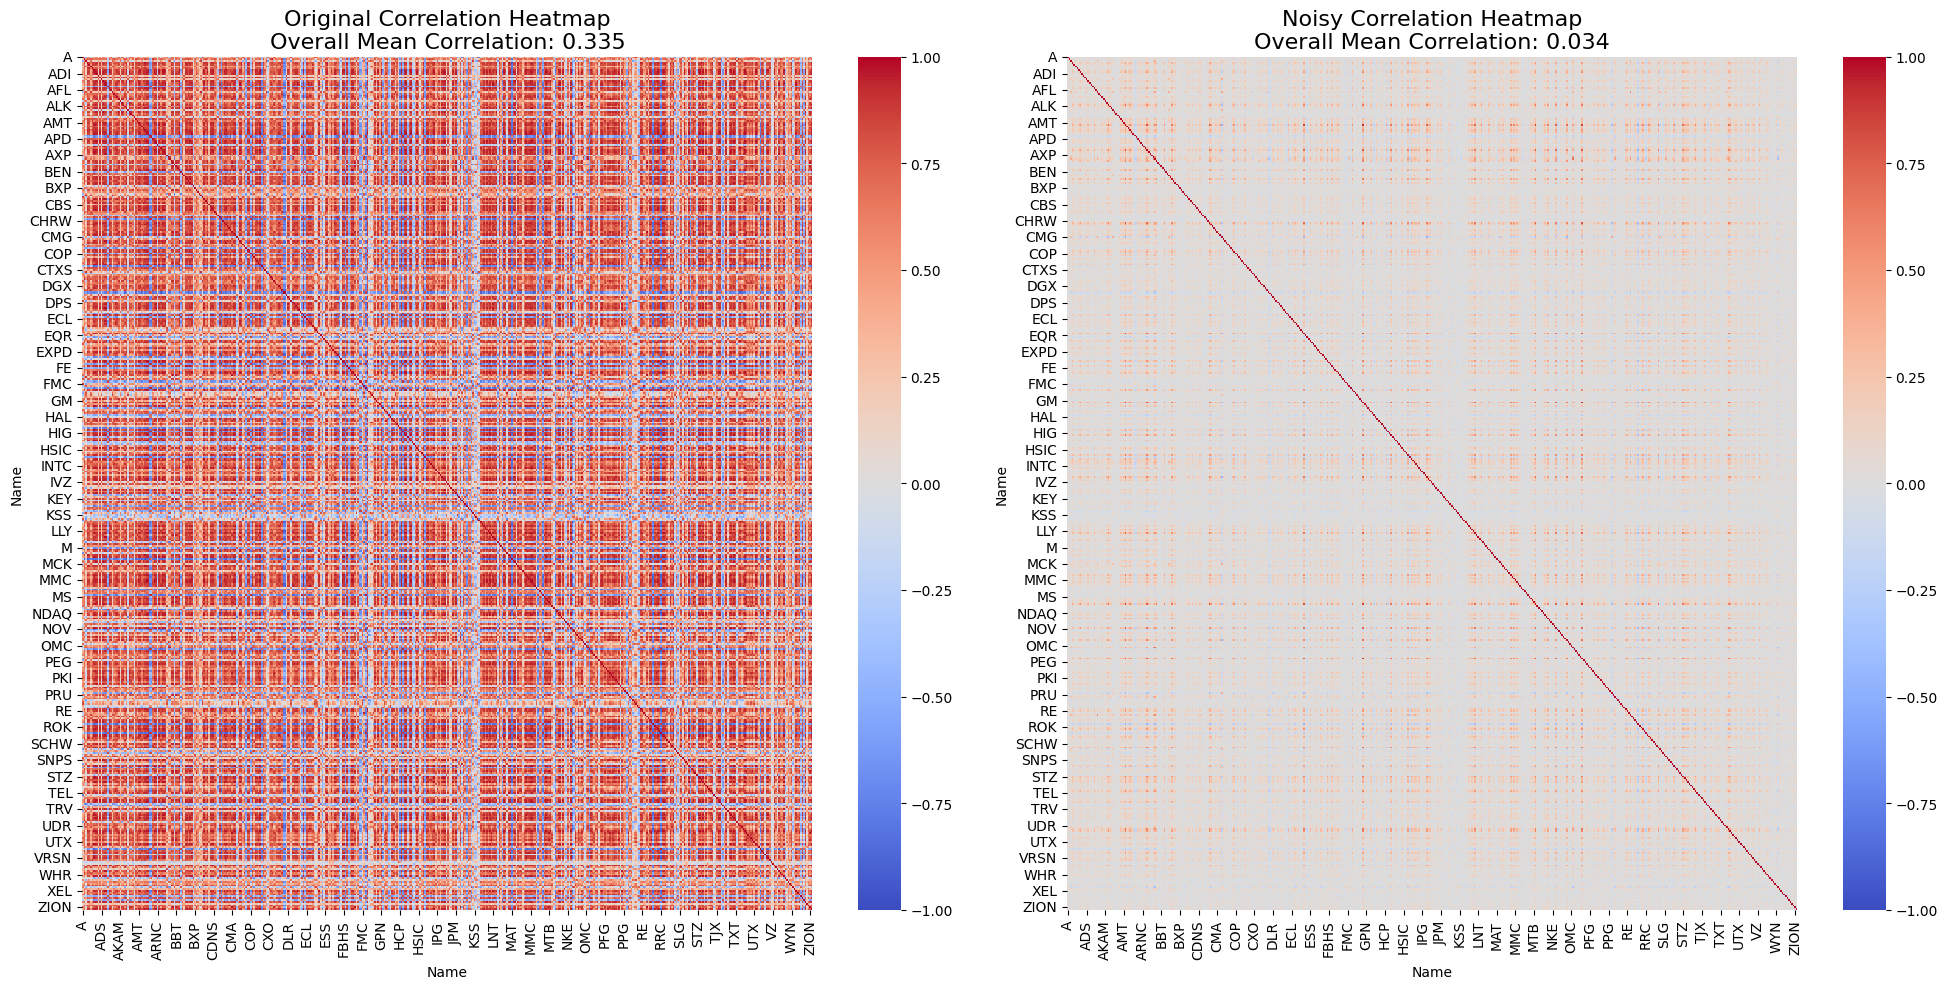

Original Mean Correlation: 0.335
Noisy Mean Correlation: 0.034
Number of NaNs in correlated matrix: 0
Number of NaNs in uncorrelated matrix: 0
[[ 45.08  44.6   44.62 ...  68.22  68.45  68.06]
 [ 14.75  14.46  14.27 ...  49.76  51.18  51.4 ]
 [ 78.9   78.39  78.6  ... 109.86 112.2  109.93]
 ...
 [ 75.85  75.65  75.44 ... 123.18 122.3  120.78]
 [ 24.14  24.21  24.49 ...  51.65  52.52  54.02]
 [ 33.05  33.26  33.74 ...  73.83  73.27  73.86]]


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/code test/cleaned_sp500_stocks_matrix.csv'
stocks_df = pd.read_csv(file_path)

# Transpose the dataframe to have dates as rows and stock names as columns for correlation calculation
stocks_df_transposed = stocks_df.set_index('Name').transpose()

# Calculate the original correlation matrix
correlation_matrix = stocks_df_transposed.corr()

# Calculate the mean of the overall correlations for the original data
mean_correlation = correlation_matrix.mean().mean()

# Add random noise to the data
noise_level = 50  # Adjust this value to control the amount of noise
noise = np.random.normal(0, noise_level, stocks_df_transposed.shape)
stocks_df_noisy = np.abs(stocks_df_transposed + noise)

# Calculate the correlation matrix for the noisy data
correlation_matrix_noisy = stocks_df_noisy.corr()

# Calculate the mean of the overall correlations in the noisy data
mean_correlation_noisy = correlation_matrix_noisy.mean().mean()

# Set up the figure for the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the original heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False, ax=axes[0])
axes[0].set_title(f'Original Correlation Heatmap\nOverall Mean Correlation: {mean_correlation:.3f}', fontsize=16)

# Plot the noisy heatmap
sns.heatmap(correlation_matrix_noisy, cmap='coolwarm', vmin=-1, vmax=1, annot=False, ax=axes[1])
axes[1].set_title(f'Noisy Correlation Heatmap\nOverall Mean Correlation: {mean_correlation_noisy:.3f}', fontsize=16)

# Show the plots
plt.tight_layout()
plt.show()

# Print the original and noisy mean correlations for reference
print(f'Original Mean Correlation: {mean_correlation:.3f}')
print(f'Noisy Mean Correlation: {mean_correlation_noisy:.3f}')

# Print only the matrix with numbers, no dates or stock ticker symbols
stocks_df_correlated = stocks_df_transposed.T.values
stocks_df_uncorrelated = stocks_df_noisy.T.values

# Check for NaN values in the matrices
print("Number of NaNs in correlated matrix:", np.isnan(stocks_df_correlated).sum())
print("Number of NaNs in uncorrelated matrix:", np.isnan(stocks_df_uncorrelated).sum())

print(stocks_df_correlated)
# Save the original transposed matrix
np.savetxt('correlated_stock_matrix.csv', stocks_df_correlated, delimiter=",", fmt='%.2f')

# Save the noisy matrix
np.savetxt('uncorrelated_stock_matrix.csv', stocks_df_uncorrelated, delimiter=",", fmt='%.2f')

Lets try rPSMF and PSMF on original vs uncorrelated data

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

# Define paths to your datasets
correlated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/correlated_stock_matrix.csv'
uncorrelated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/uncorrelated_stock_matrix.csv'
psmf_correlated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/Y_imputed_C_20_PSMF.csv'
psmf_uncorrelated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/Y_imputed_U_20_PSMF.csv'
rpsmf_correlated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/Y_imputed_C_20_rPSMF.csv'
rpsmf_uncorrelated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/Y_imputed_U_20_rPSMF.csv'

# Define paths to the mask datasets
mask_correlated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/correlated_stock_matrix_masked_20percent.csv'
mask_uncorrelated_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/uncorrelated_stock_matrix_masked_20percent.csv'

# Load datasets
correlated_df = pd.read_csv(correlated_path, header=None)
uncorrelated_df = pd.read_csv(uncorrelated_path, header=None)
psmf_correlated_df = pd.read_csv(psmf_correlated_path, header=None)
psmf_uncorrelated_df = pd.read_csv(psmf_uncorrelated_path, header=None)
rpsmf_correlated_df = pd.read_csv(rpsmf_correlated_path, header=None)
rpsmf_uncorrelated_df = pd.read_csv(rpsmf_uncorrelated_path, header=None)
# Load datasets
correlated_df = pd.read_csv(correlated_path, header=None)
uncorrelated_df = pd.read_csv(uncorrelated_path, header=None)
psmf_correlated_df = pd.read_csv(psmf_correlated_path, header=None)
psmf_uncorrelated_df = pd.read_csv(psmf_uncorrelated_path, header=None)
rpsmf_correlated_df = pd.read_csv(rpsmf_correlated_path, header=None)
rpsmf_uncorrelated_df = pd.read_csv(rpsmf_uncorrelated_path, header=None)

# Load the masks for the missing values
mask_correlated_df = pd.read_csv(mask_correlated_path, header=None)
mask_uncorrelated_df = pd.read_csv(mask_uncorrelated_path, header=None)

# Convert masks to boolean arrays (True where data was missing)
missing_mask_correlated = mask_correlated_df.values.astype(bool)
missing_mask_uncorrelated = mask_uncorrelated_df.values.astype(bool)

# Flatten the datasets and the masks to work with them
correlated_values = correlated_df.values.flatten()
uncorrelated_values = uncorrelated_df.values.flatten()
psmf_correlated_values = psmf_correlated_df.values.flatten()
psmf_uncorrelated_values = psmf_uncorrelated_df.values.flatten()
rpsmf_correlated_values = rpsmf_correlated_df.values.flatten()
rpsmf_uncorrelated_values = rpsmf_uncorrelated_df.values.flatten()
missing_mask_correlated = missing_mask_correlated.flatten()
missing_mask_uncorrelated = missing_mask_uncorrelated.flatten()

# Filter the values using the masks (only keep the imputed values)
correlated_values = correlated_values[missing_mask_correlated]
uncorrelated_values = uncorrelated_values[missing_mask_uncorrelated]
psmf_correlated_values = psmf_correlated_values[missing_mask_correlated]
psmf_uncorrelated_values = psmf_uncorrelated_values[missing_mask_uncorrelated]
rpsmf_correlated_values = rpsmf_correlated_values[missing_mask_correlated]
rpsmf_uncorrelated_values = rpsmf_uncorrelated_values[missing_mask_uncorrelated]

# Calculate performance metrics only for the imputed values
def calculate_metrics(true_values, imputed_values):
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    mae = mean_absolute_error(true_values, imputed_values)
    pearson_corr, _ = pearsonr(true_values, imputed_values)
    spearman_corr, _ = spearmanr(true_values, imputed_values)
    return rmse, mae, pearson_corr, spearman_corr

# Calculate metrics for each imputation method using correlated original matrix
psmf_correlated_metrics = calculate_metrics(correlated_values, psmf_correlated_values)
rpsmf_correlated_metrics = calculate_metrics(correlated_values, rpsmf_correlated_values)

# Calculate metrics for each imputation method using uncorrelated original matrix
psmf_uncorrelated_metrics = calculate_metrics(uncorrelated_values, psmf_uncorrelated_values)
rpsmf_uncorrelated_metrics = calculate_metrics(uncorrelated_values, rpsmf_uncorrelated_values)

# Create a DataFrame to display the results
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'Pearson Correlation', 'Spearman Rank Correlation'],
    'PSMF (Correlated)': psmf_correlated_metrics,
    'rPSMF (Correlated)': rpsmf_correlated_metrics,
    'PSMF (Uncorrelated)': psmf_uncorrelated_metrics,
    'rPSMF (Uncorrelated)': rpsmf_uncorrelated_metrics
})

# Set the Metric as the index
metrics_df.set_index('Metric', inplace=True)

# Display the table
print(metrics_df)

# Save the metrics table to a LaTeX file
latex_table_path = 'metrics_table.tex'
with open(latex_table_path, 'w') as f:
    f.write(metrics_df.to_latex(index=True))


                           PSMF (Correlated)  rPSMF (Correlated)  \
Metric                                                             
RMSE                                5.398585            5.470671   
MAE                                 3.040379            3.133662   
Pearson Correlation                 0.998398            0.998355   
Spearman Rank Correlation           0.995791            0.995659   

                           PSMF (Uncorrelated)  rPSMF (Uncorrelated)  
Metric                                                                
RMSE                                 42.861439             43.699146  
MAE                                  34.324963             34.883182  
Pearson Correlation                   0.906717              0.902838  
Spearman Rank Correlation             0.601019              0.595552  
